## Machine Machine Learning with Multiple Linear Regression

In this project we will use multiple linear regression to predict the price of a diamond, based upon color, per clarity, weight and the carat.

#### Importing the Libraries

In [22]:
## Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_colwidth', -1)

#### Dataset

In [12]:
#Load the dataset
df = pd.read_csv("..\machine\diamonds.csv", index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Exploratory Data Analysis

To see statistical details of the dataset, we'll use the describe() command again

In [13]:
df.shape

(53940, 10)

The dataset contains 53940 observations and 19 columns

In [18]:
# descriptions
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
df.dtypes

carat      float64
cut        object 
color      object 
clarity    object 
depth      float64
table      float64
price      int64  
x          float64
y          float64
z          float64
dtype: object

In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.
We are going to look at two types of plots:
Univariate plots to better understand each attribute.
Multivariate plots to better understand the relationships between attributes.

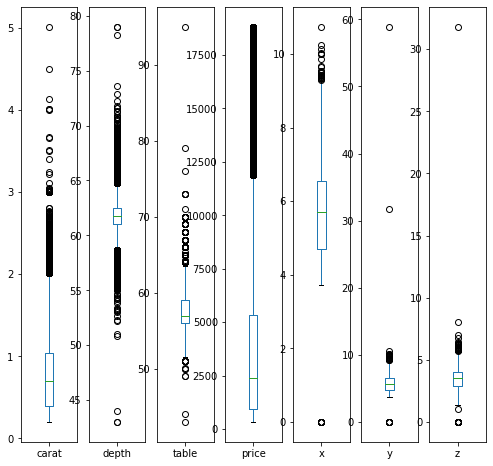

In [28]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(1,10), sharex=False, sharey=False,figsize=(12, 8))
plt.show()

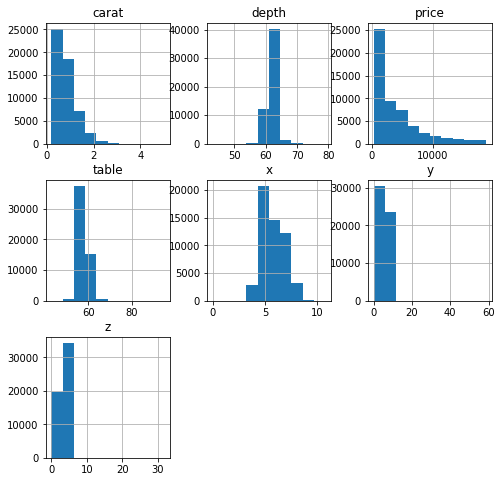

In [10]:
# histograms
df.hist(figsize=(8, 8))
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

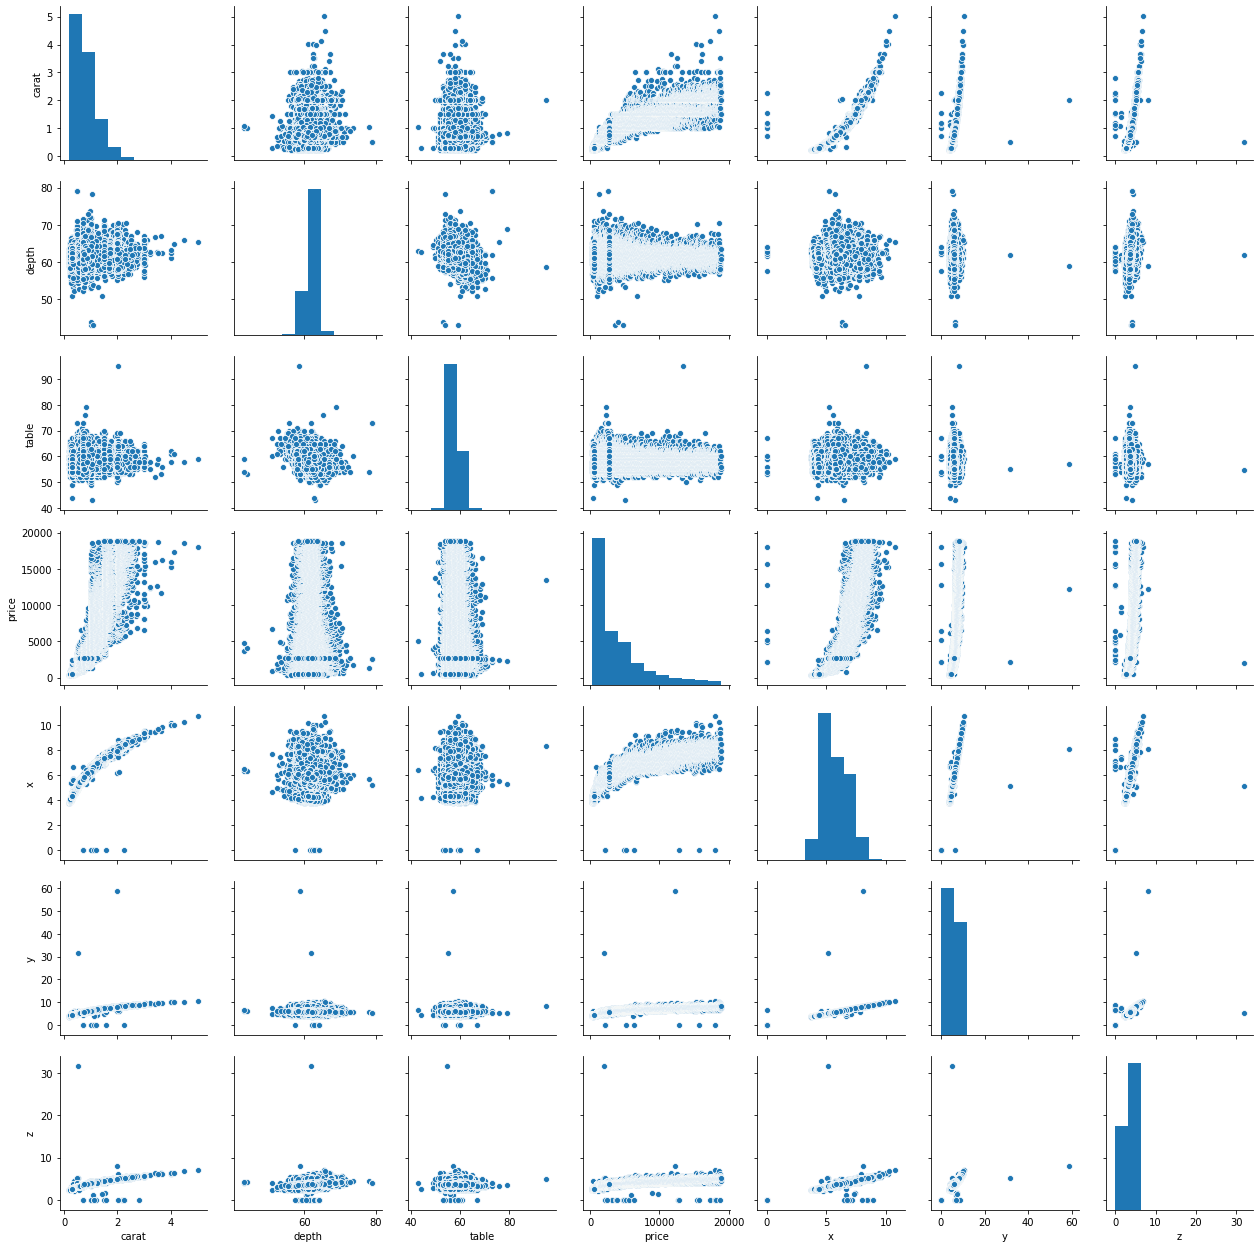

In [11]:
# pairplot matrix
sns.pairplot(df);

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

From these graphs, we can see very strong linear relationships among carat and Price.

- The basis of machine learning is math, so columns with string values like cut and clarity have to be converted to numbers.

In [30]:
# Get dummies
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


Let's take a look at the correlation heatmap

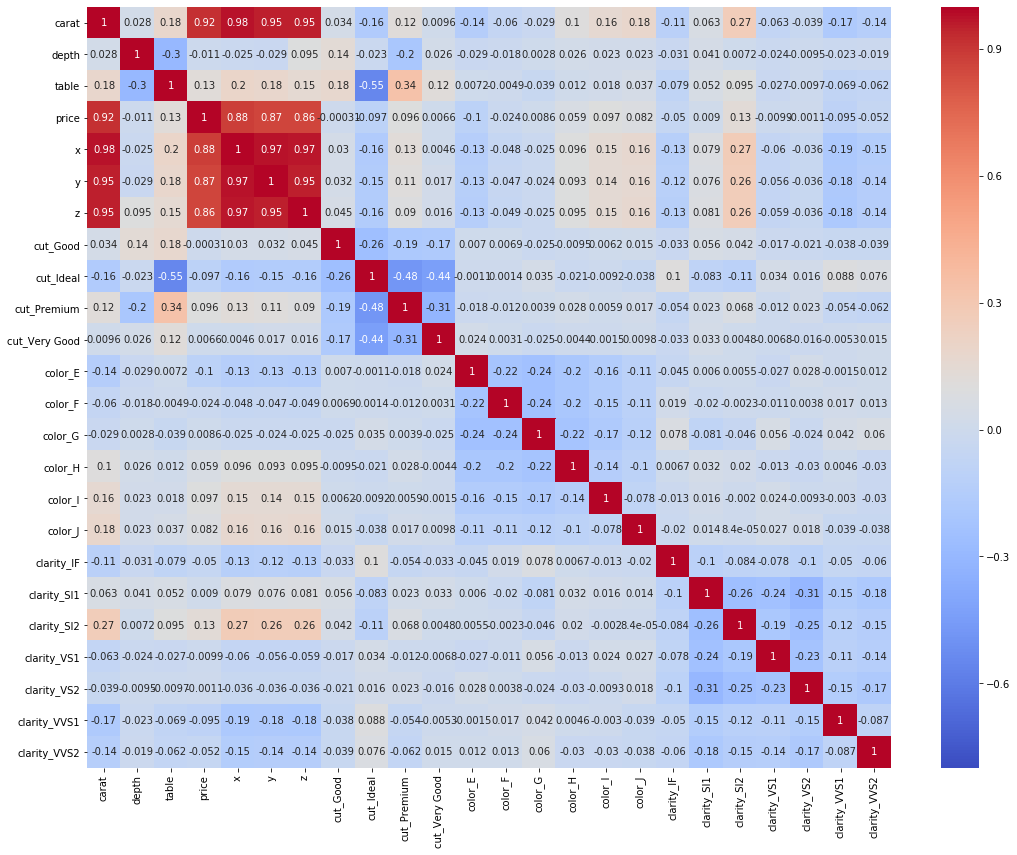

In [51]:
fig,ax = plt.subplots(figsize=(18,14))
sns.heatmap(df.corr(),vmin=-0.8, annot=True, cmap='coolwarm',ax=ax);

A correlation matrix provides a bit more evidence to the previous graphical analysis. We see that carat and price are perfectly correlated.

#### Create a Validation Dataset

- Preparing the Data
- The next step is to divide the data into attributes and labels
- Divide data into training and test sets


In [52]:
#to split your loaded data into input variables (X) and the output variable (y).
df = sklearn.utils.shuffle(df) #Resample to do random permutations of the collections. always shuffle your data to avoid any biases that may emerge b/c of some order.
X = df.drop(["price"],axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
#Print the split dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 23)
(10788, 23)
(43152,)
(10788,)


#### Training the Algorithm

- Scaling the Data

If you look at the dataset you'll notice that it is not scaled well. For instance the "cut" and "clarity" column have values between 0 and 1, while most of the rest of the columns have higher values. Therefore, before training the algorithm, we will need to scale our data down.

In [54]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [55]:
# Train the algorithm using fit()
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Finds the best value for the intercept and slope

In [56]:
# Retrieve the intercept value
regressor.intercept_

3919.970916759361

In [57]:
# Retrieving the slope (coefficient of x)
regressor.coef_

array([ 5.32653744e+03, -8.84594759e+01, -6.22015911e+01, -1.10231117e+03,
       -2.62043503e+00, -4.16618670e+01,  1.68139825e+02,  3.97862623e+02,
        3.28834091e+02,  3.01082139e+02, -8.11096095e+01, -1.06045862e+02,
       -1.99757029e+02, -3.51833516e+02, -4.39302790e+02, -5.25035683e+02,
        9.70718491e+02,  1.58525873e+03,  1.02449546e+03,  1.65433292e+03,
        1.80838040e+03,  1.26337018e+03,  1.45429516e+03])

#### Coefficients of regression model

In [58]:
# find the most optimal coefficients for all the attributes.
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
carat,5326.537443
depth,-88.459476
table,-62.201591
x,-1102.311166
y,-2.620435
z,-41.661867
cut_Good,168.139825
cut_Ideal,397.862623
cut_Premium,328.834091
cut_Very Good,301.082139


This means that for a unit increase of carat results in an increase of 5,326 on the price.

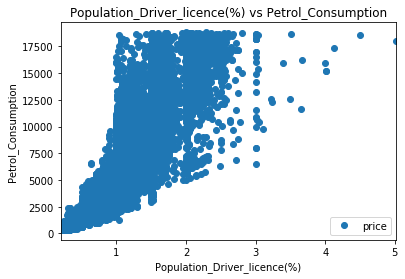

In [38]:
df.plot( x = "carat", y = "price",style='o')
plt.title("Population_Driver_licence(%) vs Petrol_Consumption")
plt.xlabel("Population_Driver_licence(%)")
plt.ylabel("Petrol_Consumption")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the carat and price.

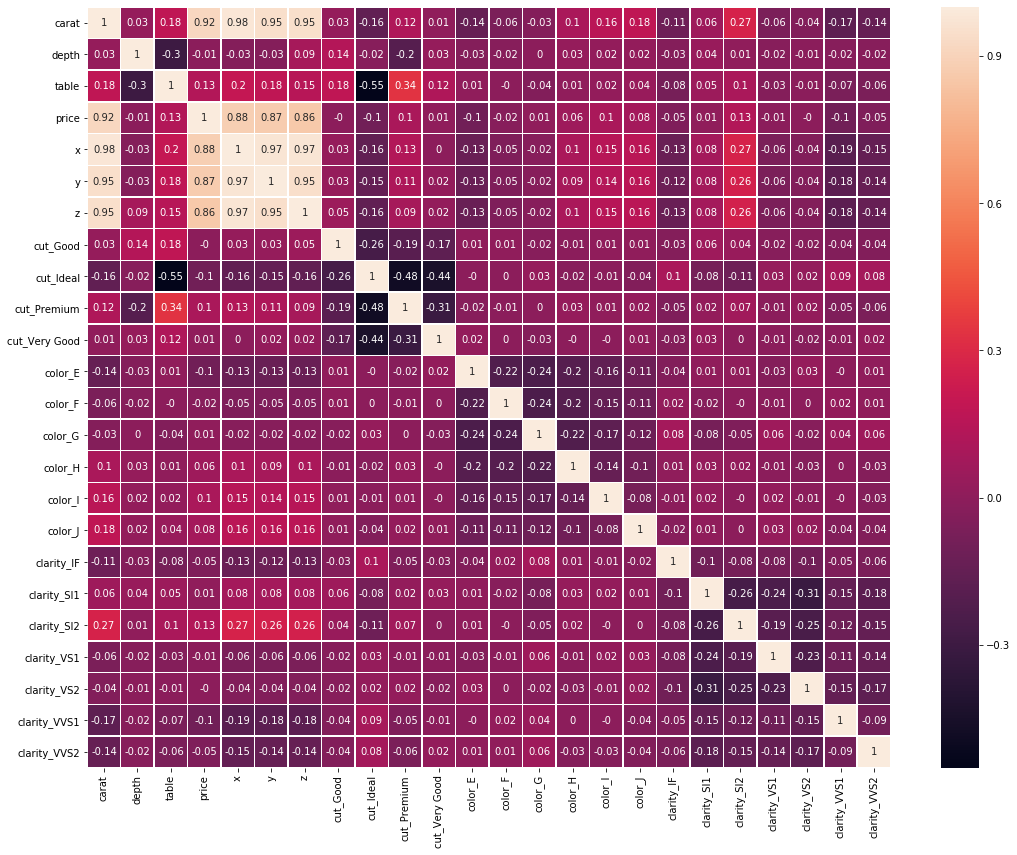

In [59]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(18,14)) 
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [60]:
# implement cross validation
all_accuracies = cross_val_score(regressor, X=X_train, y=y_train, cv=5)

In [61]:
all_accuracies

array([0.9179682 , 0.92399659, 0.91526609, 0.92088227, 0.9195219 ])

Find standard deviation

In [62]:
print(all_accuracies.mean())

0.9195270107224378


In [ ]:
The mean value is 0.9195, or 91.95%.

In [63]:
#Sandard deviation
print(all_accuracies.std())

0.0029120179070205206


The result is: 0.00291 which is 2.91%. This is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

#### Making Predictions

In [64]:
# predictions
y_pred = regressor.predict(X_test)

In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
17256,6906,7751.896473
34808,878,1369.035466
11158,4946,5179.742830
13222,5460,5060.909951
21707,627,-226.504017
...,...,...
15806,6324,6551.576992
6355,4034,4797.025811
23550,11560,10228.737415
41161,1200,1825.143273


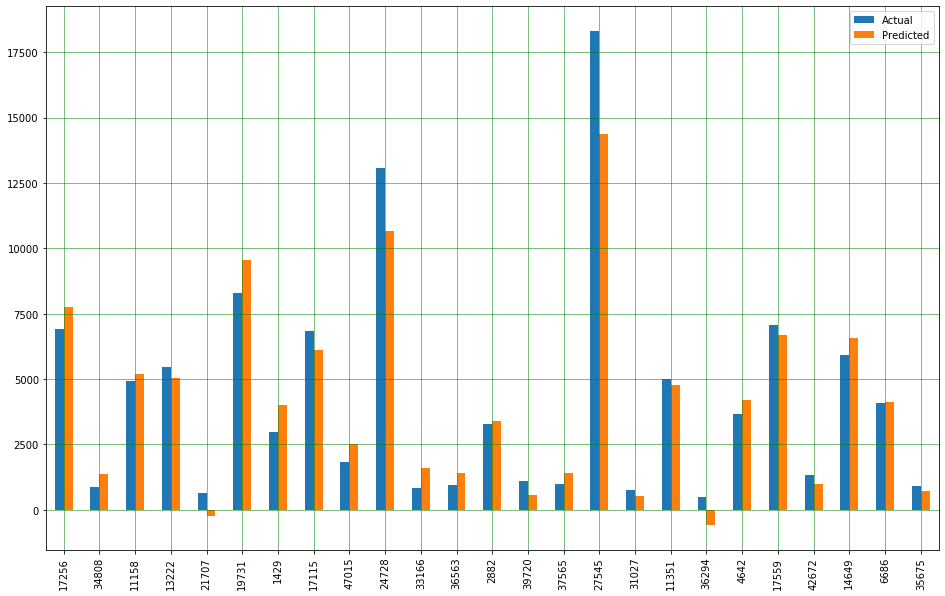

In [66]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. We'll do this by finding the values for MAE, MSE and RMSE.

In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 748.0669722952986
Mean Squared Error: 1295381.211156302
Root Mean Squared Error: 1138.1481499155996


In [69]:
# multiple linear regression 
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Tue, 19 May 2020   Prob (F-statistic):               0.00
Time:                        19:38:19   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2184.4774    408.197      5.352      0.000    1384.409    2984.546
carat          1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
depth           -63.8061      4.535    -14.071      0.000     -72.694     -54.918
table           -26.4741      2.912     -9.092      0.000     -32.181     -20.767
x             -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
y                 9.6089     19.333      0.497      0.619     -28.284      47.502
z               -50.1189     33.486     -1.497      0.134    -115.752      15.515
cut_Good        579.7514     33.592     17.259      0.000     513.911     645.592
cut_Ideal       832.9118     33.407     24.932      0.000     767.433     898.391
cut_Premium     762.1440     32.228     23.649      0.000     698.978     825.310
cut_Very Good   726.7826     32.241     22.542      0.000     663.591     789.975
color_E        -209.1181     17.893    -11.687      0.000    -244.189    -174.047
color_F        -272.8538     18.093    -15.081      0.000    -308.316    -237.392
color_G        -482.0389     17.716    -27.209      0.000    -516.763    -447.315
color_H        -980.2667     18.836    -52.043      0.000   -1017.185    -943.348
color_I       -1466.2445     21.162    -69.286      0.000   -1507.723   -1424.766
color_J       -2369.3981     26.131    -90.674      0.000   -2420.615   -2318.181
clarity_IF     5345.1022     51.024    104.757      0.000    5245.095    5445.110
clarity_SI1    3665.4721     43.634     84.005      0.000    3579.949    3750.995
clarity_SI2    2702.5863     43.818     61.677      0.000    2616.702    2788.471
clarity_VS1    4578.3979     44.546    102.779      0.000    4491.087    4665.708
clarity_VS2    4267.2236     43.853     97.306      0.000    4181.270    4353.177
clarity_VVS1   5007.7590     47.160    106.187      0.000    4915.326    5100.192
clarity_VVS2   4950.8141     45.855    107.967      0.000    4860.938    5040.690
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From the output, you can see that our R-squared (R2) achieved is 0.92, show how well the model fits the data.